	일반적으로 안내 서비스(데스크 서비스), 식사(룸 서비스)․세탁․통역 등 개별 봉사 서비스를 제공하고, 공연․회의, 오락․스포츠, 주류 및 상품 판매 등의 관련 부대시설을 2종 이상 제공하는 숙박시설을 운영하는 산업활동을 말한다.  

<예시>  
·관광 호텔    
·의료 관광 일반 호텔  
·소형 호텔  
·수상 관광 호텔  
·한국 전통 호텔  
  
<제외>  
·가족 호텔업(55103)  
·호스텔업(55109)  

In [1]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [2]:
data = pd.read_csv("업종별/호텔업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155309 entries, 0 to 155308
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      155309 non-null  object
 1   CARD_SIDO_NM  155309 non-null  object
 2   CARD_CCG_NM   155309 non-null  object
 3   STD_CLSS_NM   155309 non-null  object
 4   HOM_SIDO_NM   155309 non-null  object
 5   HOM_CCG_NM    154317 non-null  object
 6   AGE           155309 non-null  object
 7   SEX_CTGO_CD   155309 non-null  int64 
 8   FLC           155309 non-null  int64 
 9   CSTMR_CNT     155309 non-null  int64 
 10  AMT           155309 non-null  int64 
 11  CNT           155309 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 15.4+ MB
None


In [4]:
#안쓰는 컬럼 드랍, 정제
df=data.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [5]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155309 entries, 0 to 155308
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      155309 non-null  object
 1   CARD_SIDO_NM  155309 non-null  object
 2   HOM_SIDO_NM   155309 non-null  object
 3   AGE           155309 non-null  object
 4   SEX_CTGO_CD   155309 non-null  int64 
 5   FLC           155309 non-null  int64 
 6   CSTMR_CNT     155309 non-null  int64 
 7   AMT           155309 non-null  int64 
 8   CNT           155309 non-null  int64 
 9   year          155309 non-null  int64 
 10  month         155309 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 14.2+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT     AMT  \
0   201901           강원          서울  40s            1    3          3  214300   
1   201901           강원          서울  50s            1    4          3  126500   
2   201901           강원        

In [6]:
print(df.CARD_SIDO_NM.unique()) #16
print(df.HOM_SIDO_NM.unique())

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '울산' '인천' '전남' '전북' '제주'
 '충남' '충북']
['서울' '강원' '경기' '경남' '대구' '인천' '충북' '경북' '광주' '대전' '부산' '세종' '울산' '전북'
 '제주' '충남' '전남']


CARD_SIDO_NM
전북        57521005
충북       530914357
전남       532390773
광주       835439378
경남      1113122863
대전      1633781193
충남      1877411393
울산      2264987578
경기      4038616732
경북      5459268825
대구      6881296039
인천     11767115098
강원     14915774285
제주     16573484422
부산     24176112464
서울    132363116112
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

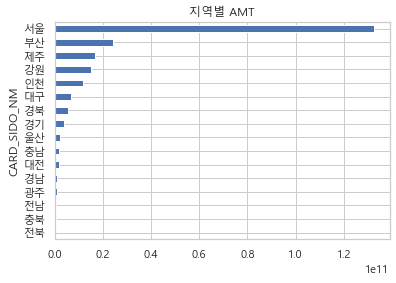

In [7]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

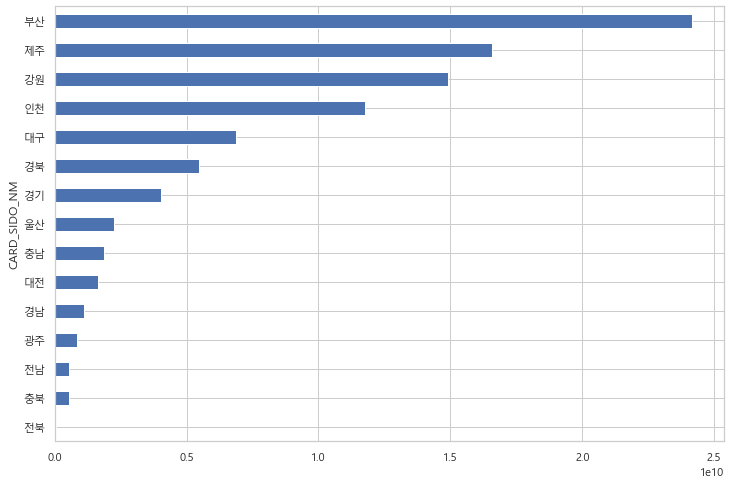

In [9]:
#서울 제외한 그래프
df1_1= df1[:15]
df1_1.plot(kind="barh", figsize=(12,8))

REG_YYMM
201901    19810557915
201902    15695213582
201903    13817431974
201904    13639159307
201905    16165528501
201906    13652917977
201907    14091286013
201908    18614699092
201909    12732299741
201910    16100753005
201911    13400133158
201912    21380718943
202001    19828903792
202002    11017116476
202003     5073633041
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

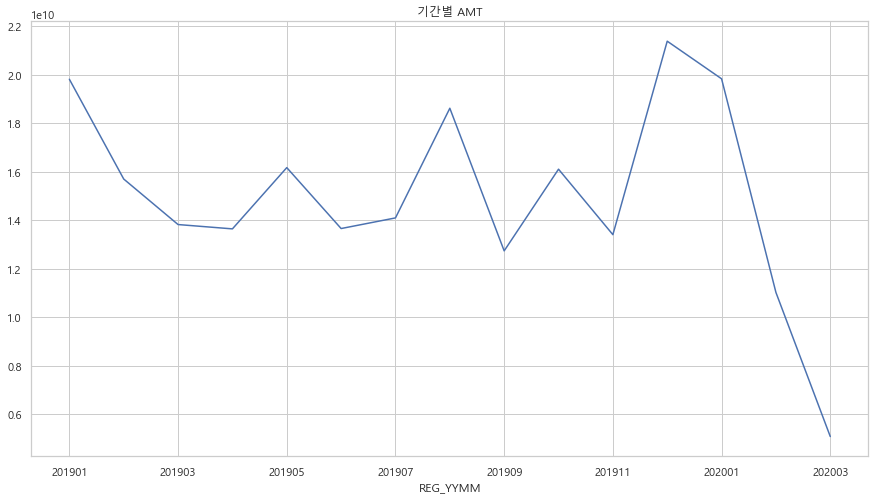

In [10]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

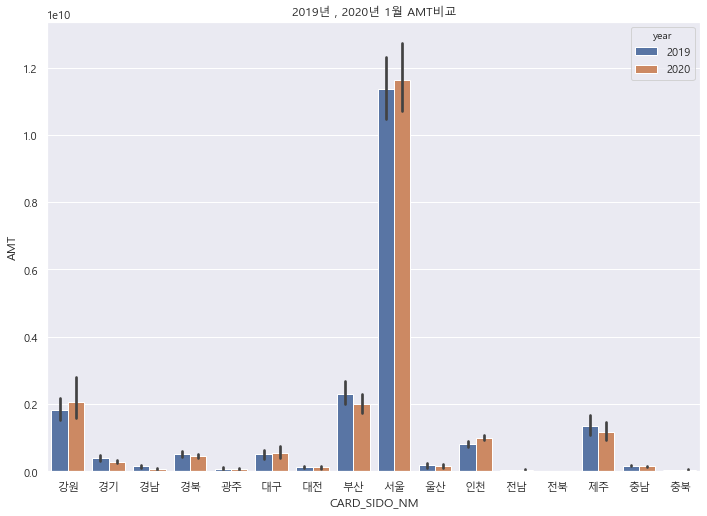

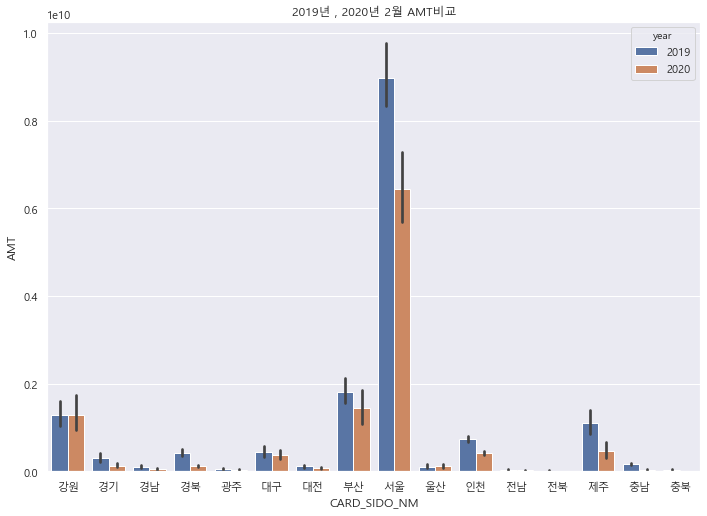

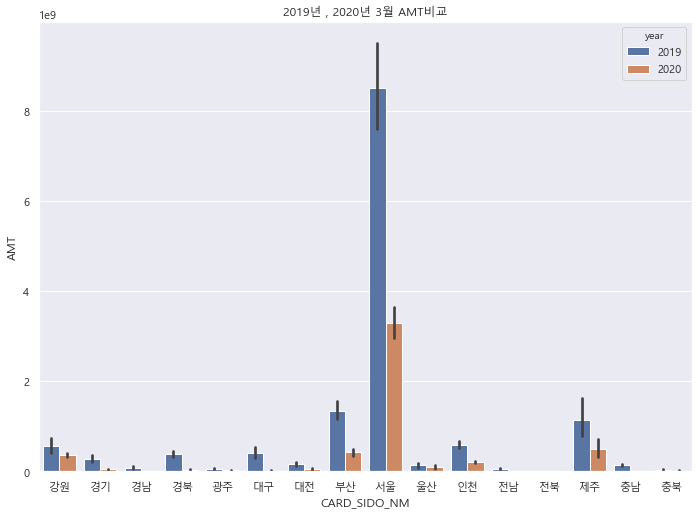

In [11]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

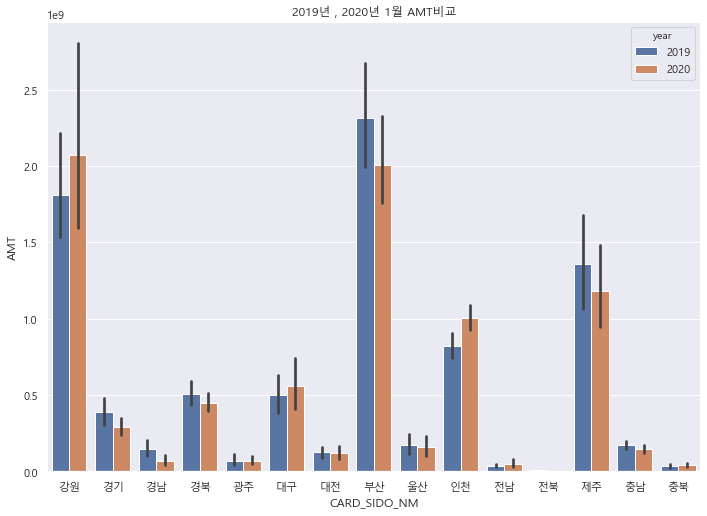

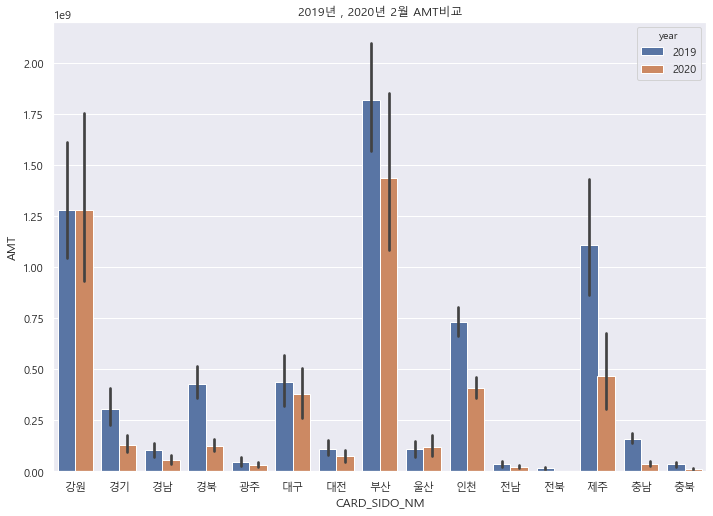

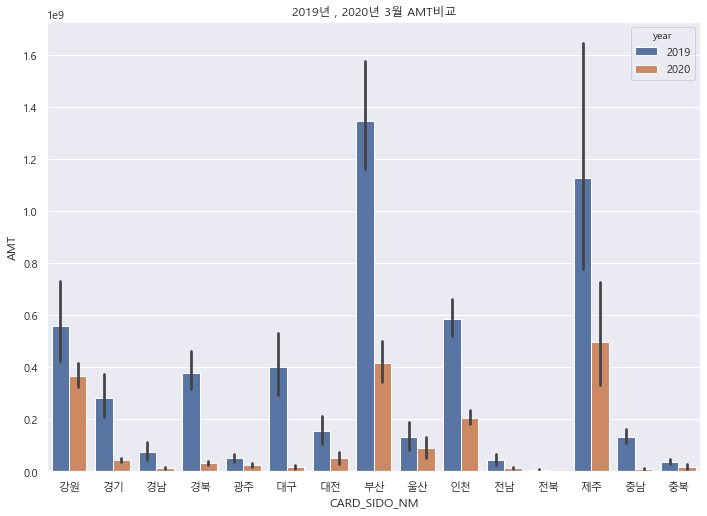

In [12]:
df_noS = df[df['CARD_SIDO_NM']!='서울']
#서울 제외...
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df_noS[df_noS.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

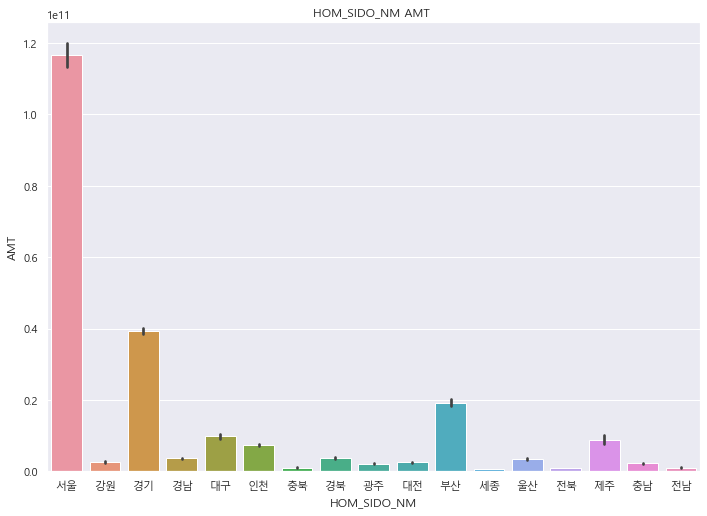

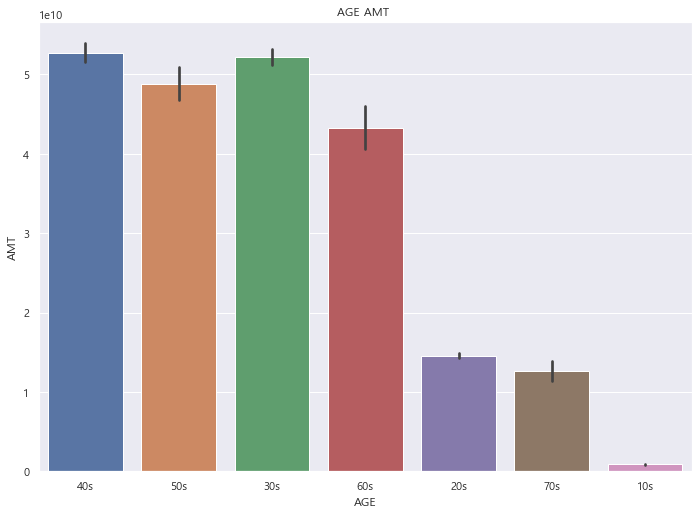

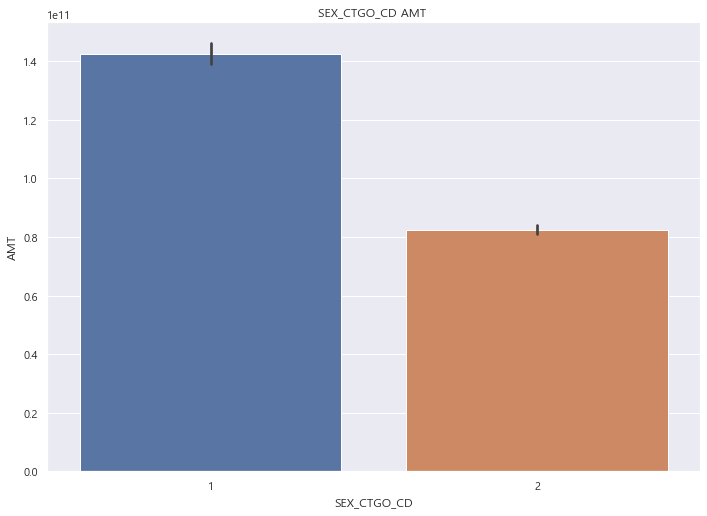

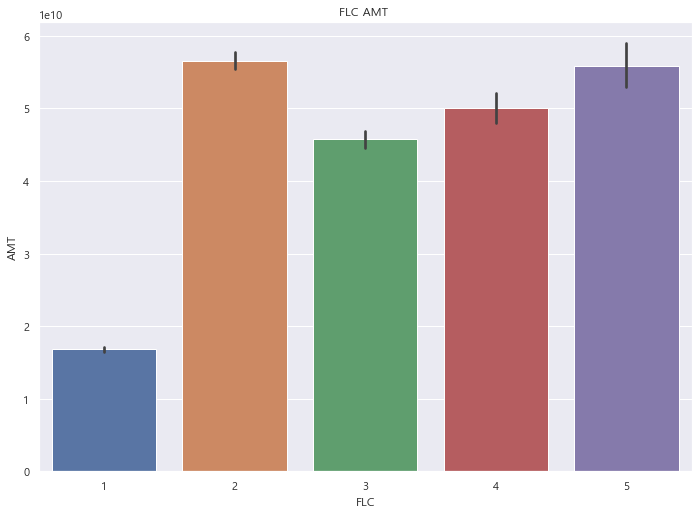

In [13]:
cols = ['HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()